# MiRAC-A

The following example demonstrates the use of MiRAC-A data collected during ACLOUD, AFLUX, and MOSAiC-ACA. The Microwave Radar/Radiometer for Arctic Clouds (MiRAC) consists of an active component, a 94 GHz Frequency Modulated Continuous Wave (FMCW) cloud radar, and a passive 89 GHz microwave radiometer. MiRAC-A is mounted on Polar 5 with a fixed viewing angle of 25° against flight direction.

More information on the instrument can be found in [Mech et al. (2019)](https://amt.copernicus.org/articles/12/5019/2019/). 

In addition, the liquid water path product over open ocean derived from the passive channel during the ACLOUD campaign [Kliesch et al. (2021)](https://doi.pangaea.de/10.1594/PANGAEA.933387) is included.

If you have questions or if you would like to use the data for a publication, please don't hesitate to get in contact with the dataset authors as stated in the dataset attributes `contact` or `author`.

## Data access
Some of the data, like the preliminary data of the HALO-(AC)3 campaign, is stored on the (AC)3 nextcloud server. This requires username and password as credentials (registration) that need to be loaded from environment variables

In [1]:
import os
ac3cloud_username = os.environ['AC3_USER']
ac3cloud_password = os.environ['AC3_PASSWORD']

To analyse the data they first have to be loaded by importing the (AC)<sup>3</sup> airborne meta data catalogue. To do so the ac3airborne package has to be installed. More information on how to do that and about the catalog can be found [here](https://github.com/igmk/ac3airborne-intake#ac3airborne-intake-catalogue).

In [2]:
import ac3airborne

In [3]:
cat = ac3airborne.get_intake_catalog()

datasets = []
for campaign in ['ACLOUD', 'AFLUX', 'MOSAiC-ACA','HALO-AC3']:
    datasets.extend(list(cat[campaign]['P5']['MiRAC-A']))
datasets

['ACLOUD_P5_RF04',
 'ACLOUD_P5_RF05',
 'ACLOUD_P5_RF06',
 'ACLOUD_P5_RF07',
 'ACLOUD_P5_RF08',
 'ACLOUD_P5_RF10',
 'ACLOUD_P5_RF11',
 'ACLOUD_P5_RF15',
 'ACLOUD_P5_RF17',
 'ACLOUD_P5_RF18',
 'ACLOUD_P5_RF19',
 'ACLOUD_P5_RF20',
 'ACLOUD_P5_RF21',
 'ACLOUD_P5_RF22',
 'ACLOUD_P5_RF23',
 'ACLOUD_P5_RF25',
 'AFLUX_P5_RF03',
 'AFLUX_P5_RF04',
 'AFLUX_P5_RF05',
 'AFLUX_P5_RF06',
 'AFLUX_P5_RF07',
 'AFLUX_P5_RF08',
 'AFLUX_P5_RF09',
 'AFLUX_P5_RF10',
 'AFLUX_P5_RF11',
 'AFLUX_P5_RF12',
 'AFLUX_P5_RF13',
 'AFLUX_P5_RF14',
 'AFLUX_P5_RF15',
 'MOSAiC-ACA_P5_RF05',
 'MOSAiC-ACA_P5_RF06',
 'MOSAiC-ACA_P5_RF07',
 'MOSAiC-ACA_P5_RF08',
 'MOSAiC-ACA_P5_RF09',
 'MOSAiC-ACA_P5_RF10',
 'MOSAiC-ACA_P5_RF11']

```{note}
Have a look at the attributes of the xarray dataset `ds_mirac_a` for all relevant information on the dataset, such as author, contact, or citation information.
```

In [4]:
ds_mirac_a = cat['ACLOUD']['P5']['MiRAC-A']['ACLOUD_P5_RF05'](user=ac3cloud_username,password=ac3cloud_password).to_dask()
ds_mirac_a

Invalid MIT-MAGIC-COOKIE-1 key

<xarray.Dataset>
Dimensions:        (time: 11765, height: 1400)
Coordinates:
  * time           (time) datetime64[ns] 2017-05-25T08:18:18 ... 2017-05-25T1...
  * height         (height) float32 -1e+03 -995.0 -990.0 ... 5.99e+03 5.995e+03
Data variables:
    Ze_unfiltered  (time, height) float32 ...
    Ze             (time, height) float32 ...
    tb             (time) float32 ...
    Ze_flag        (time, height) uint8 ...
    lon            (time) float32 ...
    lat            (time) float32 ...
    alt            (time) float32 ...
Attributes: (12/15)
    title:        MiRAC-A observations onboard Polar 5 during ACLOUD
    institution:  Institute for Geophysics and Meteorology (IGM), University ...
    source:       airborne observation
    history:      measured onboard Polar 5 during ACLOUD campaign; processed,...
    references:   https://doi.org/10.5194/amt-12-5019-2019
    comment:      the radar system and the 89 GHz channel were inclined by 25...
    ...           ...
    platform:     Polar 5
    flight_id:    RF05
    instrument:   MiRAC-A: Microwave Radar/radiometer for Arctic Clouds (active)
    author:       Nils Risse
    contact:      mario.mech@uni-koeln.de, l.kliesch@uni-koeln.de, n.risse@un...
    created:      2022-03-06

The dataset includes the radar reflectivity (`Ze`, `Ze_unfiltered`), the radar reflectivity filter mask (`Ze_flag`), the 89 GHz brightness temperature (`TB_89`) as well as information on the aircraft's flight altitude (`altitude`). The radar reflectivity is defined on a regular `time`-`height` grid with corresponding target positions (`lat`, `lon`). The full dataset is available on PANGAEA.

## Load Polar 5 flight phase information
Polar 5 flights are divided into segments to easily access start and end times of flight patterns. For more information have a look at the respective [github](https://github.com/igmk/flight-phase-separation) repository.

At first we want to load the flight segments of (AC)³airborne

In [5]:
meta = ac3airborne.get_flight_segments()

The following command lists all flight segments into the dictionary `segments`

In [6]:
segments = {s.get("segment_id"): {**s, "flight_id": flight["flight_id"]}
             for campaign in meta.values()
             for platform in campaign.values()
             for flight in platform.values()
             for s in flight["segments"]
            }

In this example we want to look at a high-level segment during ACLOUD RF05

In [7]:
seg = segments["ACLOUD_P5_RF05_hl09"]

Using the start and end times of the segment `ACLOUD_P5_RF05_hl09` stored in `seg`, we slice the MiRAC data to this flight section.

In [8]:
ds_mirac_a_sel = ds_mirac_a.sel(time=slice(seg["start"], seg["end"]))

In [11]:
ds_mirac_a_sel

<xarray.Dataset>
Dimensions:        (time: 981, height: 1400)
Coordinates:
  * time           (time) datetime64[ns] 2017-05-25T11:28:15 ... 2017-05-25T1...
  * height         (height) float32 -1e+03 -995.0 -990.0 ... 5.99e+03 5.995e+03
Data variables:
    Ze_unfiltered  (time, height) float32 ...
    Ze             (time, height) float32 ...
    tb             (time) float32 187.6 188.3 188.1 187.5 ... 187.1 186.7 186.8
    Ze_flag        (time, height) uint8 ...
    lon            (time) float32 0.2013 0.2087 0.2124 ... 4.933 4.94 4.944
    lat            (time) float32 77.84 77.84 77.84 77.84 ... 77.83 77.83 77.83
    alt            (time) float32 2.899e+03 2.897e+03 ... 2.881e+03 2.882e+03
Attributes: (12/15)
    title:        MiRAC-A observations onboard Polar 5 during ACLOUD
    institution:  Institute for Geophysics and Meteorology (IGM), University ...
    source:       airborne observation
    history:      measured onboard Polar 5 during ACLOUD campaign; processed,...
    references:   https://doi.org/10.5194/amt-12-5019-2019
    comment:      the radar system and the 89 GHz channel were inclined by 25...
    ...           ...
    platform:     Polar 5
    flight_id:    RF05
    instrument:   MiRAC-A: Microwave Radar/radiometer for Arctic Clouds (active)
    author:       Nils Risse
    contact:      mario.mech@uni-koeln.de, l.kliesch@uni-koeln.de, n.risse@un...
    created:      2022-03-06

## Plots

The flight section during ACLOUD RF05 is flown at about 3 km altitude in west-east direction during a cold-air outbreak event perpendicular to the wind field. Clearly one can identify the roll-cloud structure in the radar reflectivity and the 89 GHz brightness temperature.

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from numpy import log10
plt.style.use("../../mplstyle/book")

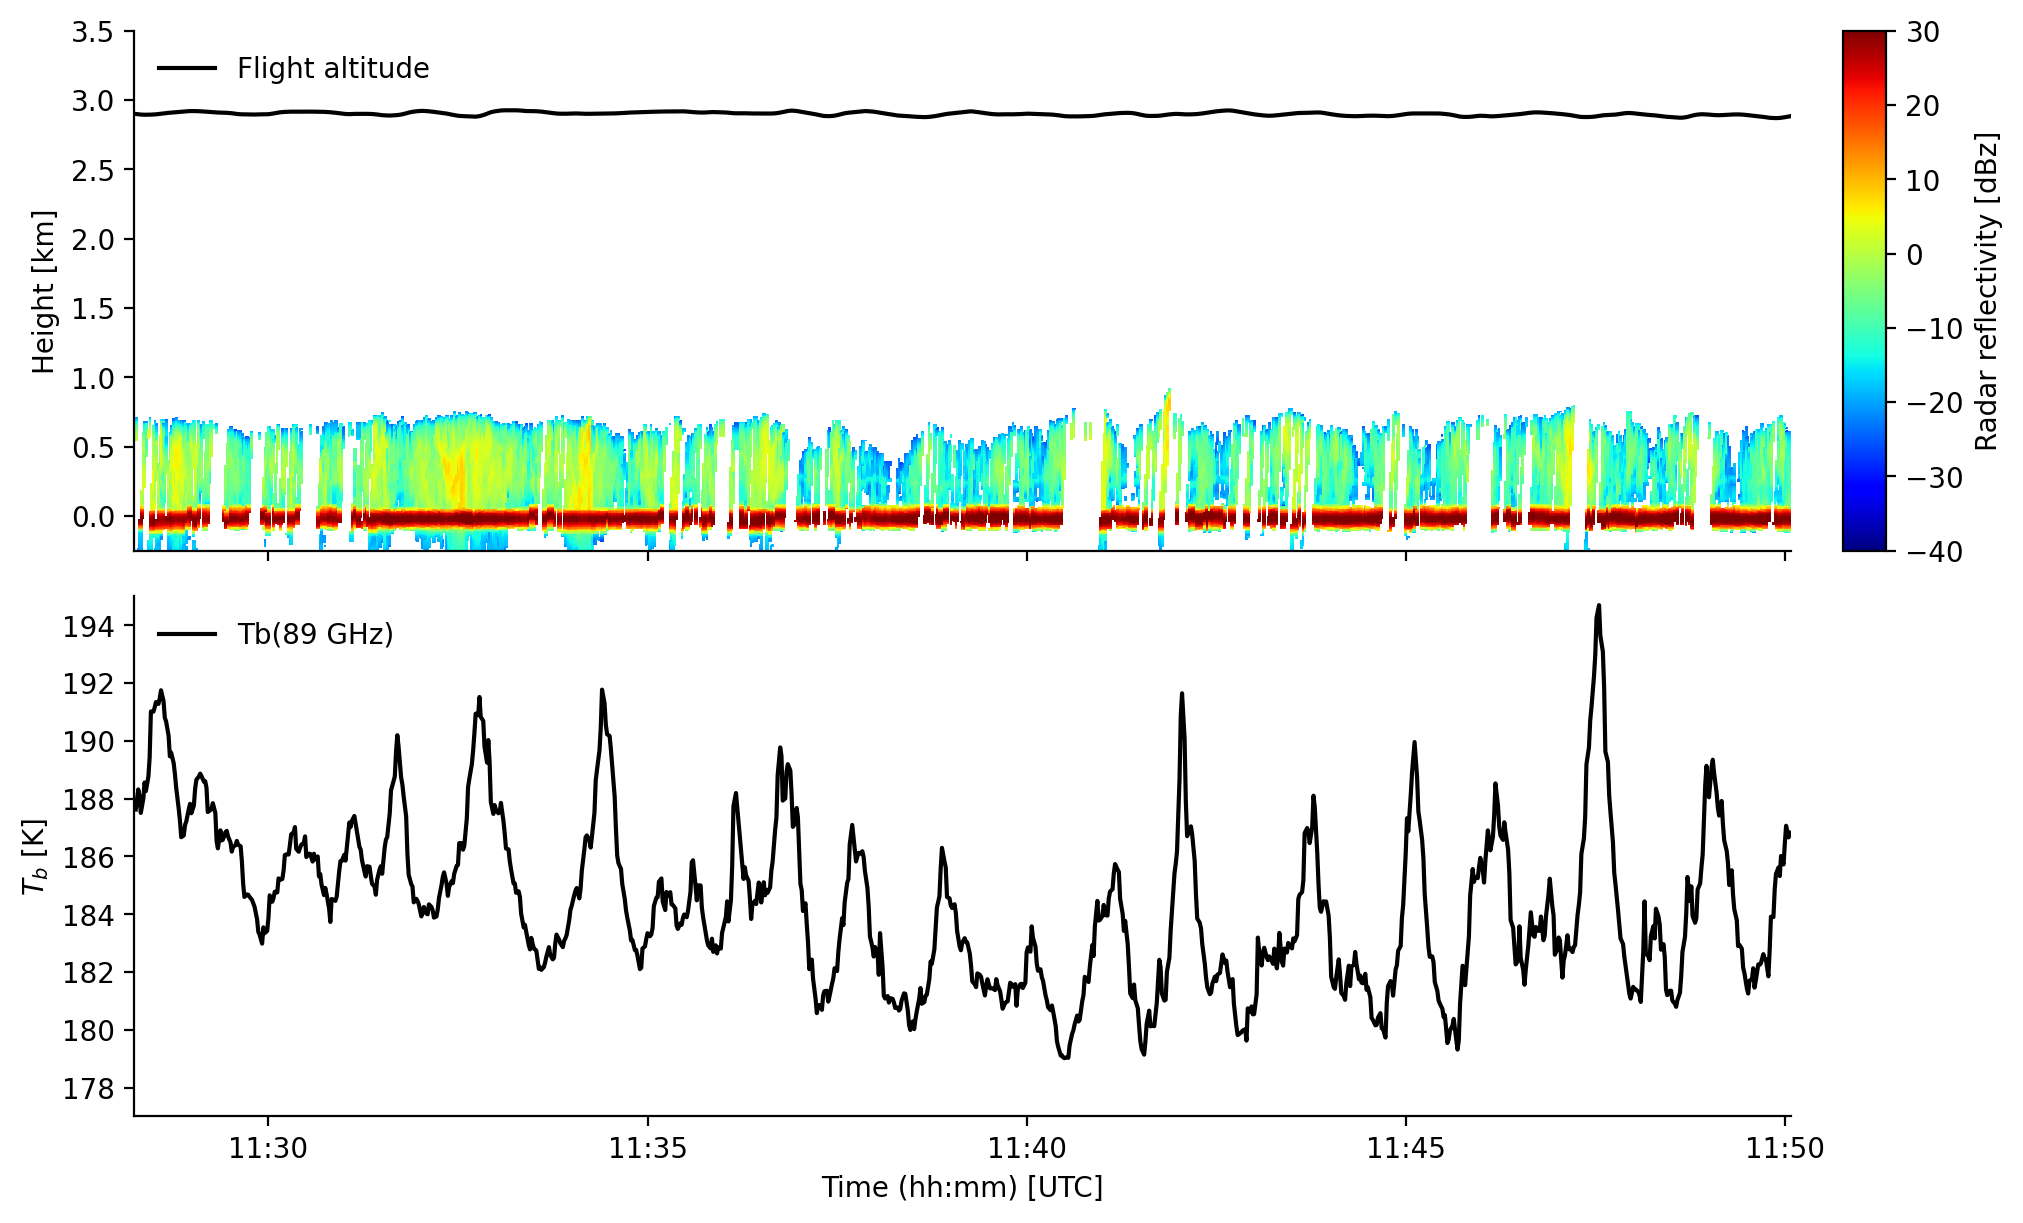

In [13]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

# 1st: plot flight altitude and radar reflectivity
ax1.plot(ds_mirac_a_sel.time, ds_mirac_a_sel.alt*1e-3, label='Flight altitude', color='k')

im = ax1.pcolormesh(ds_mirac_a_sel.time, ds_mirac_a_sel.height*1e-3, 10*log10(ds_mirac_a_sel.Ze).T, vmin=-40, vmax=30, cmap='jet', shading='nearest')
fig.colorbar(im, ax=ax1, label='Radar reflectivity [dBz]')
ax1.set_ylim(-0.25, 3.5)
ax1.set_ylabel('Height [km]')
ax1.legend(frameon=False, loc='upper left')

# 2nd: plot 89 GHz TB
ax2.plot(ds_mirac_a_sel.time, ds_mirac_a_sel.tb, label='Tb(89 GHz)', color='k')
ax2.set_ylim(177, 195)
ax2.set_ylabel('$T_b$ [K]')
ax2.set_xlabel('Time (hh:mm) [UTC]')
ax2.legend(frameon=False, loc='upper left')

ax2.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

plt.show()

## LWP

In [14]:
list(cat['ACLOUD']['P5']['MiRAC-A_LWP'])

['ACLOUD_P5_RF05',
 'ACLOUD_P5_RF06',
 'ACLOUD_P5_RF07',
 'ACLOUD_P5_RF11',
 'ACLOUD_P5_RF14',
 'ACLOUD_P5_RF15',
 'ACLOUD_P5_RF16',
 'ACLOUD_P5_RF18',
 'ACLOUD_P5_RF19',
 'ACLOUD_P5_RF20',
 'ACLOUD_P5_RF21',
 'ACLOUD_P5_RF22']

In [15]:
ds_lwp = cat['ACLOUD']['P5']['MiRAC-A_LWP']['ACLOUD_P5_RF05'].to_dask()

In [16]:
ds_lwp

<xarray.Dataset>
Dimensions:      (time: 11765)
Coordinates:
  * time         (time) datetime64[ns] 2017-05-25T08:18:18 ... 2017-05-25T12:...
    lat          (time) float64 ...
    lon          (time) float64 ...
Data variables:
    trajectory   |S1 ...
    alt          (time) float32 ...
    status_flag  (time) int32 ...
    lwp          (time) float32 ...
Attributes: (12/14)
    institution:  Institute for Geophysics and Meteorology, University of Col...
    contact:      l.kliesch@uni-koeln.de, mario.mech@uni-koeln.de
    source:       Kliesch and Mech (2019, doi: https://doi.org/10.1594/PANGAE...
    Conventions:  CF-1.7
    title:        LWP retrieval of MiRAC on Polar 5
    variable:     liquid water path (LWP)
    ...           ...
    campaign:     ACLOUD: Arctic CLoud Observations Using airborne measuremen...
    keywords:     LWP, MiRAC, ACLOUD, Polar 5
    featureType:  trajectory
    history:      created: 2021-05-27
    author:       Leif-Leonard Kliesch
    summary:      LWP is retrieved nadir over sea-ice-free ocean from the 89 ...

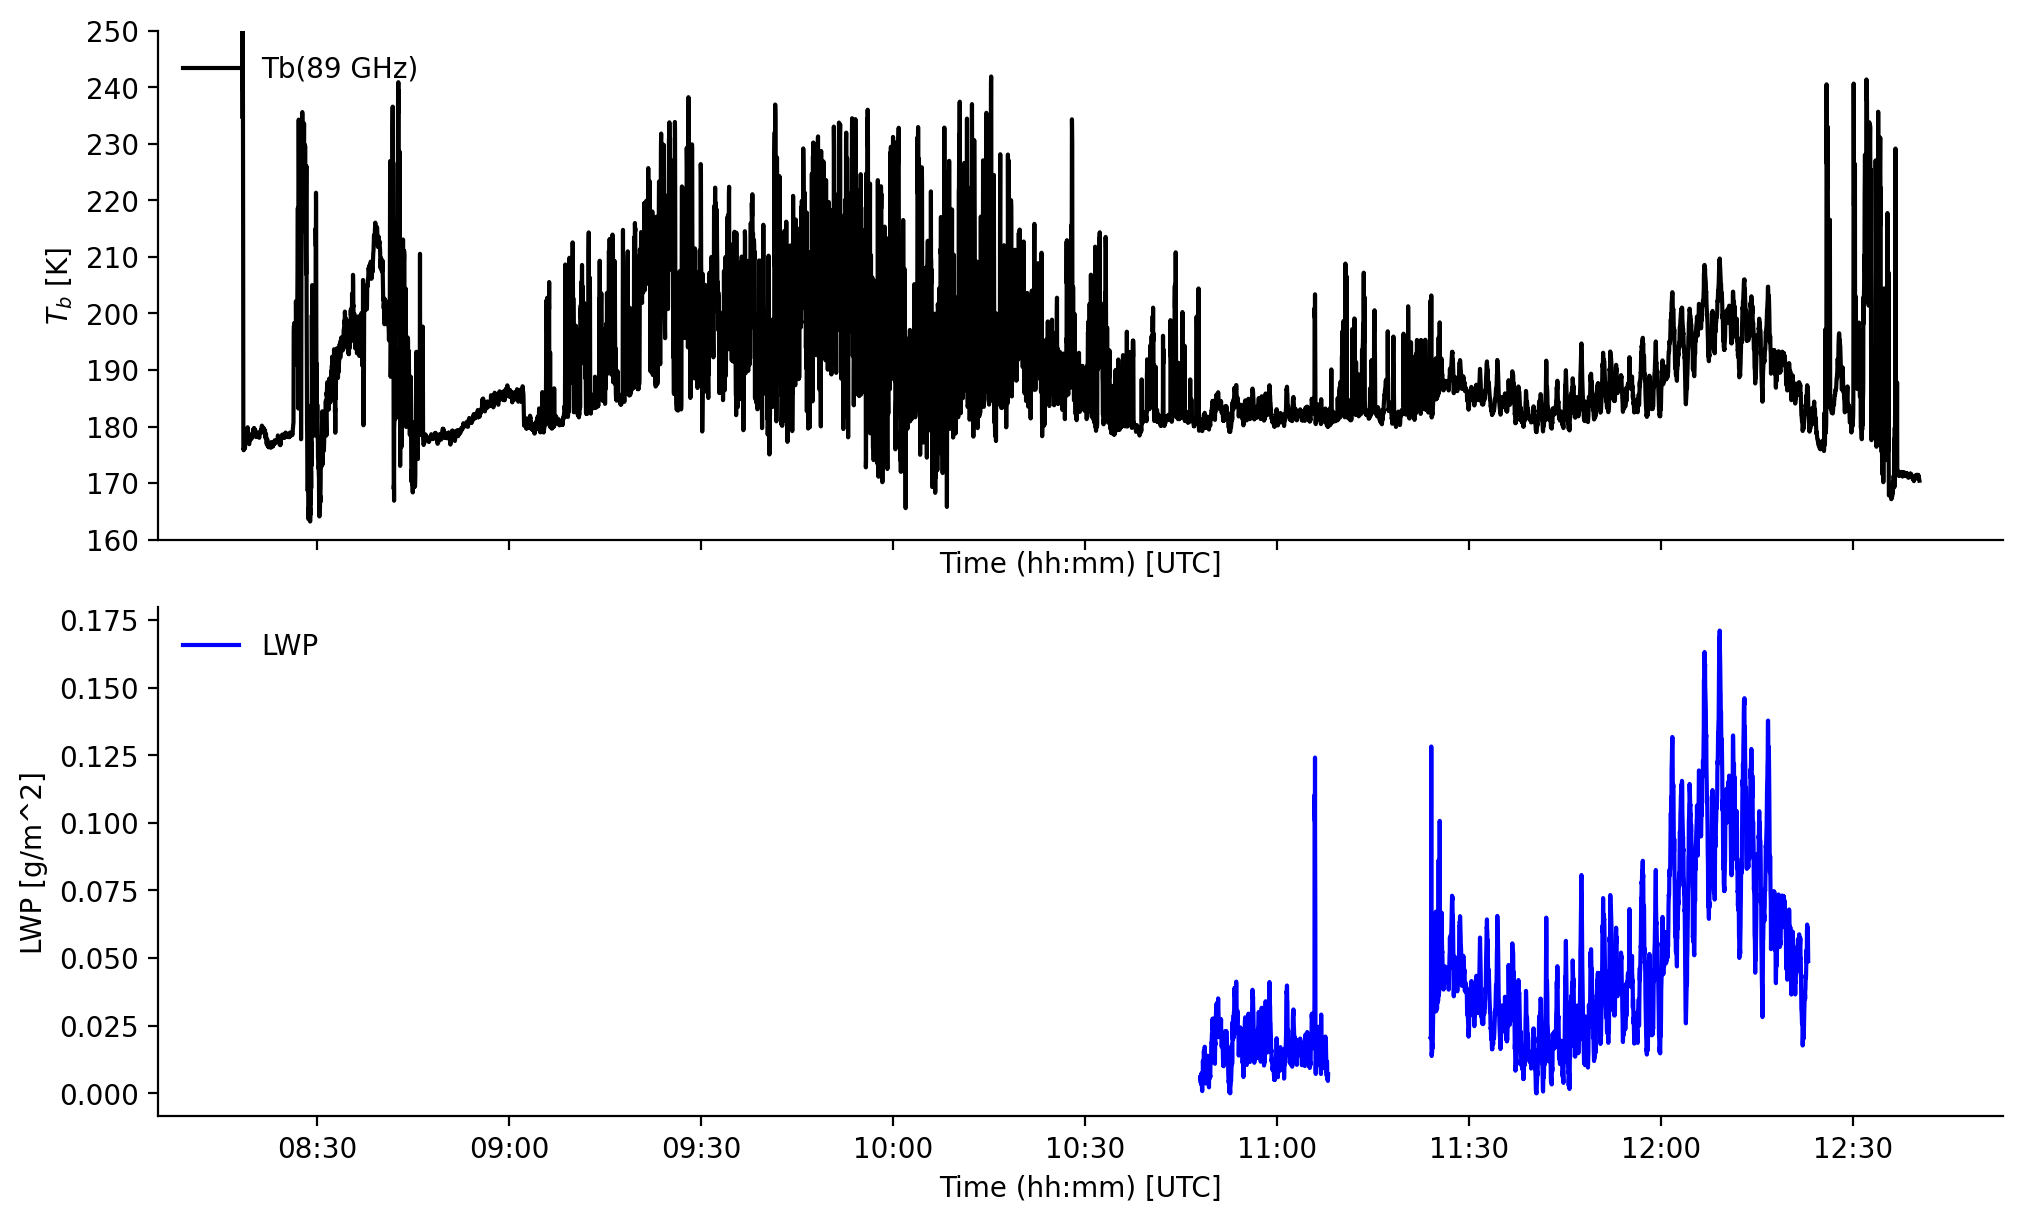

In [18]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

# 1st: plot 89 GHz TB
ax1.plot(ds_mirac_a.time, ds_mirac_a.tb, label='Tb(89 GHz)', color='k')
ax1.set_ylim(160, 250)
ax1.set_ylabel('$T_b$ [K]')
ax1.set_xlabel('Time (hh:mm) [UTC]')
ax1.legend(frameon=False, loc='upper left')

# 2nd: plot 89 GHz TB
ax2.plot(ds_lwp.time, ds_lwp.lwp, label='LWP', color='b')
#ax2.set_ylim(177, 195)
ax2.set_ylabel('LWP [g/m^2]')
ax2.set_xlabel('Time (hh:mm) [UTC]')
ax2.legend(frameon=False, loc='upper left')

ax2.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

plt.show()